# Experiment Class Examples

## In this notbook we provide easy example on how access to the experimental results such as neural recording, behaviours, etc... 

Each of the classes listed below are designed to load the data from their respective experiment. 
The classes have methods to allow easy access to the data, and some plot methods to see neural recordings and animal trajectories.

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
import numpy as np

Let's start with *Hippocampus-independent phase precession in entorhinal grid cells* by Hafting et al 2008 (https://www.nature.com/articles/nature06957)

In [2]:
from neuralplayground.experiments import Hafting2008Data

Part of the data is already loaded in the repo. You can initialize the class with 

```verbose = True``` 

to print the original readme written by the authors describing the dataset, and a list of the recordings

In [3]:
hafting_data = Hafting2008Data(verbose=False)

If you want access to the whole dataset, download the data from https://archive.norstore.no/pages/public/datasetDetail.jsf?id=C43035A4-5CC5-44F2-B207-126922523FD9 and add it to the path with the rest of the data for the given class. You can get the path of the data by running

In [4]:
hafting_data.data_path

'/home/rodrigo/SSD/Projects/EHC_model_comparison/neuralplayground/experiments/hafting_2008/'

The class already loaded the data from the original format and organized it. The available data is added to a dataframe of the form

In [5]:
recording_list = hafting_data.show_data(full_dataframe=False)  # full_datagrame = true will show everything available

Dataframe with recordings


,rat_id,session,recorded_vars
rec_index,,,
0,11015,13120410,"[EEG, position, t5c1]"
1,11265,13030610,"[EEG, EG2, position, t5c1, t8c2]"
2,11265,15020610,"[EEG, position, t3c2, t7c1]"
3,11265,16030611,"[EEG, EG2, position, t4c1, t4c2, t4c4]"
4,11340,01120511,"[EEG, EG2, position, t7c1]"
5,11343,16120511,"[EEG, EG2, position, t1c1]"
6,11607,02110610,"[EEG, EG2, position, t8c1]"
7,11607,28110611,"[EEG, EG2, EG3, EG4, position, t6c2]"
8,11647,09010715,"[EEG, EG2, EG3, EG4, position, t8c1]"


Each of the recordings has a rat_id, session id, and the recorded variables you have access to. You can ask for a description from the authors by asking for the data readme (or initialize the class with verbosity)

In [6]:
hafting_data.show_readme()

These cells are from layers II and III of medial entorhinal cortex and have  been published in Hafting et al. (Nature, 2008). 

The files are in matlab format. They include spike and position times for a number of simultaneously recorded cells from rats that were running on a linear track (mostly 320 cm).
The cells were recorded in the dorsocaudal 25% portion of the medial entorhinal cortex. 

The cell id is based on tetrode number and cell number (i.e: t2c7).

The EEG file is included to enable analyses of theta phase relationships etc.


There are 3 file types available for each recording: EEG data, Position data and Spike data.

The naming convention for the files is as follow

Rat number - session number - file type (i.e: 11015-13120410_EEG)

The spike data file has the cell id as the file type (i.e: 11015-13120410_t5c1).


Each session duration is normally 10 minutes, but some sessions combine 2 or more 10 minutes sessions, this is marked in 
the file name by using "+" between the

Now, to have access to the data, you just need to specify a recording index (if the recording index is not given, it will give a nice default one), or a list of recording index as follows

In [7]:
recorded_data = hafting_data.get_recording_data(recording_index=[1, 2])

```recorded_data``` will be a list with the information for each of the requested recordings. The first component of the list is a dictionary with the raw data, the second is a list of the recorded variables, and the third is a dictionary with the session information. Each of the dictionaries have the keys listed in the ```recorded_vars```, so you have access to those. For example, you can access the position of the mouse of the recording index 2 by running

In [8]:
recording_index1 = recorded_data[1]  # Data from recording index 2
dictionary_with_data = recording_index1[0]

In [9]:
dictionary_with_data.keys()

dict_keys(['EEG', 'position', 't3c2', 't7c1'])

In [10]:
dictionary_with_data["position"]

{'posx': array([[114.27345937],
        [115.67325168],
        [115.67325168],
        ...,
        [-85.89684058],
        [-86.83003545],
        [-86.83003545]]),
 'posy': array([[13.67351186],
        [13.67351186],
        [13.67351186],
        ...,
        [-4.0571907 ],
        [-4.0571907 ],
        [-4.0571907 ]]),
 'post': array([[0.00000e+00],
        [2.00000e-02],
        [4.00000e-02],
        ...,
        [1.19994e+03],
        [1.19996e+03],
        [1.19998e+03]])}

In [11]:
recording_index1[1], recording_index1[2]  # This are the recorded variables, and the session information for the given index

(['EEG', 'position', 't3c2', 't7c1'],
 {'rat_id': '11265', 'session': '15020610'})

## Plotting data
There are two built in plotting methods from the class ```plot_recording_tetr``` and ```plot_trajectory```. Both of these functions receive a recording index, or a list of recording index. For the plot of the neural recording, you can also specify which tetrode you want. The plotting methods will also return the data used to make the plot. For example, the session ith recording index 3 has 3 different tetrode recording for the same session. Let's plot one of the specific tetrodes with its corresponding behavioral data.

In [12]:
recording_list.iloc[3]

rat_id                                            11265
session                                        16030611
recorded_vars    [EEG, EG2, position, t4c1, t4c2, t4c4]
Name: 3, dtype: object

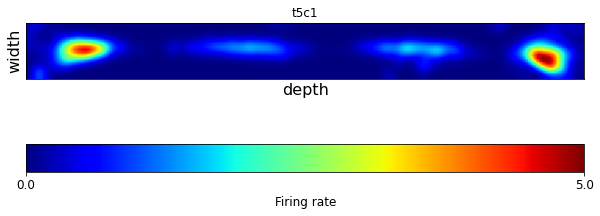

In [13]:
rate_map, x_bin, y_bin = hafting_data.plot_recording_tetr(recording_index=0)#, tetrode_id="t4c2")  # Default tetrode will be the first in the list

In [14]:
rate_map.shape

(20, 200)

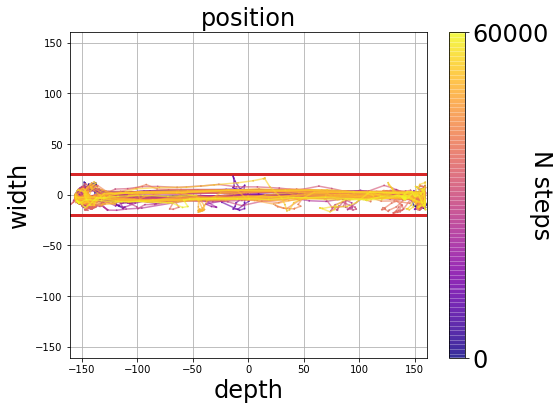

In [15]:
x, y, time_steps = hafting_data.plot_trajectory(recording_index=3)

In [16]:
x, y, time_steps

(array([151.57280868, 151.57280868, 151.57280868, ..., -17.47555086,
        -14.6580782 , -14.6580782 ]),
 array([-4.87141913, -4.40184036, -4.40184036, ...,  2.64184129,
         3.58099884,  3.58099884]),
 array([0.00000e+00, 2.00000e-02, 4.00000e-02, ..., 1.19994e+03,
        1.19996e+03, 1.19998e+03]))

## Other experiments

Other available experiment implemented with the same methods are
- *Conjunctive Representation of Position, Direction, and Velocity in Entorhinal Cortex*, Sargolini et al 2006 (https://www.science.org/doi/10.1126/science.1125572)
- *Integration of grid maps in merged environments*, Wernle et al. 2018 (https://www.nature.com/articles/s41593-017-0036-6)

Sargolini2006 works in the same way as Hafting2008

In [17]:
from neuralplayground.experiments import Sargolini2006Data, Wernle2018Data

In [18]:
sargolini_data = Sargolini2006Data(verbose=True)

The sample includes conjunctive cells and head direction cells from layers III and V of medial entorhinal cortex and have  been published in 
Sargolini et al. (Science, 2006). 

The files are in matlab format. They include spike and position times for recorded cells from rats that were running in a 1 x 1 m
enclosure. The cells were recorded in the dorsocaudal 25% portion of the medial entorhinal cortex. Position is given for two LEDs 
to enable calculation of head direction.

The cell id is based on tetrode number and cell number (i.e: t2c7).

The file naming convention is as follow:

Rat number - session number _ cell id (i.e: 11084-03020501_t2c1).

Each session duration is normally 10 minutes, but some sessions are combination of 2 or more 10 minutes sessions, this is marked in 
the file name by using "+" between the session numbers (i.e: 11207-21060501+02_t6c1). Note that the 6 first digits in the session 
number is the date of the recording.

When loading the files into Matlab you 

,rat_id,session,recorded_vars
rec_index,,,
0,11016,02020502,"[T5C1, T7C1, EEG, EGF, position]"
1,11016,25010501,"[T6C2, EEG, EGF, position]"
2,11016,28010501,"[T1C2, EEG, EGF, position]"
3,11016,29010503,"[T5C1, T6C1, T6C2, T7C1, EEG, EGF, position]"
4,11016,31010502,"[T5C2, T6C1, T6C2, T6C3, T8C2, EEG, EGF, posit..."


In [19]:
sargolini_data.data_path

'/home/rodrigo/SSD/Projects/EHC_model_comparison/neuralplayground/experiments/sargolini_2006/raw_data_sample/'

In [20]:
recording_list = sargolini_data.show_data(full_dataframe=False)

Dataframe with recordings


,rat_id,session,recorded_vars
rec_index,,,
0,11016,02020502,"[T5C1, T7C1, EEG, EGF, position]"
1,11016,25010501,"[T6C2, EEG, EGF, position]"
2,11016,28010501,"[T1C2, EEG, EGF, position]"
3,11016,29010503,"[T5C1, T6C1, T6C2, T7C1, EEG, EGF, position]"
4,11016,31010502,"[T5C2, T6C1, T6C2, T6C3, T8C2, EEG, EGF, posit..."


In [21]:
recorded_data = sargolini_data.get_recording_data(recording_index=[1, 2])

In [22]:
 recorded_data  # Same as before

[[{'T6C2': array([[  6.6695625 ],
          [  6.76122917],
          [  6.783625  ],
          ...,
          [590.77109375],
          [590.97908333],
          [591.00879167]]),
   'EEG': {'EEG': array([[ -4.10714286],
           [  0.        ],
           [ 57.95275591],
           ...,
           [  4.13948256],
           [-24.64285714],
           [-32.85714286]]),
    'Fs': array([[250]], dtype=uint8)},
   'EGF': {'EEG': array([[97.62783986],
           [95.92717412],
           [97.88454412],
           ...,
           [22.39744691],
           [36.35574119],
           [33.58012635]]),
    'Fs': array([[4800]], dtype=uint16)},
   'position': {'posx': array([[-10.79728665],
           [-10.08984879],
           [-10.08984879],
           ...,
           [-12.95946559],
           [-13.754559  ],
           [-13.754559  ]]),
    'posy': array([[-35.64708661],
           [-39.19048846],
           [-39.19048846],
           ...,
           [ 22.04826086],
           [ 21.6437009

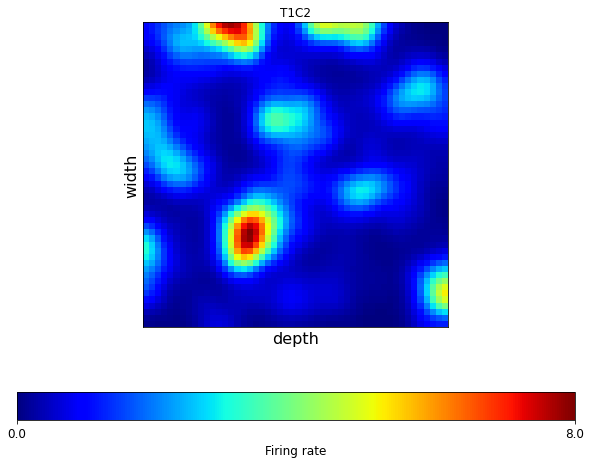

In [23]:
rate_map, x_bin, y_bin = sargolini_data.plot_recording_tetr(recording_index=2)#, tetrode_id="T6C1")

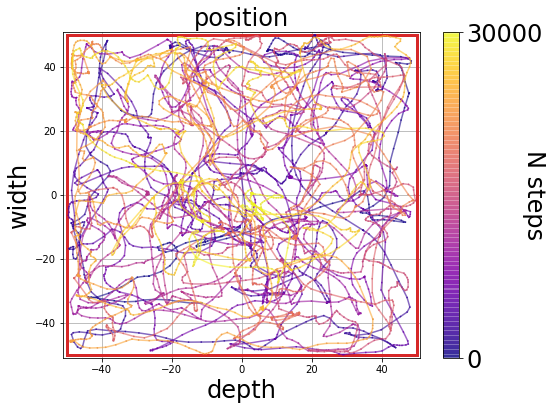

In [24]:
x, y, time_steps = sargolini_data.plot_trajectory(recording_index=3, plot_every=5)  # Plot every 5 to make the plot lighter

## Wernle et al. 2018 is slightly different..

The recording list from the data have 19 different animals, and each of the animals is recorded before and after merging the room. These recordings correspond to the first 38 (19x2) recording indexes in the recording list as shown below

In [25]:
w_data = Wernle2018Data()

In [26]:
recording_list = w_data.show_data(full_dataframe=False)

Dataframe with recordings


,session,recorded_vars,before_merge
rec_index,,,
0,0,"[time, posx, posy, speed_index, spikes, ratema...",False
1,0,"[time, posx, posy, speed_index, ratemap_dev]",True
2,1,"[time, posx, posy, speed_index, spikes, ratema...",False
3,1,"[time, posx, posy, speed_index, ratemap_dev]",True
4,2,"[time, posx, posy, speed_index, spikes, ratema...",False
...,...,...,...
289,125,ratemap,False
290,126,ratemap,True
291,126,ratemap,False


In [27]:
recording_list.iloc[0:38]

,session,recorded_vars,before_merge
rec_index,,,
0,0,"[time, posx, posy, speed_index, spikes, ratema...",False
1,0,"[time, posx, posy, speed_index, ratemap_dev]",True
2,1,"[time, posx, posy, speed_index, spikes, ratema...",False
3,1,"[time, posx, posy, speed_index, ratemap_dev]",True
4,2,"[time, posx, posy, speed_index, spikes, ratema...",False
5,2,"[time, posx, posy, speed_index, ratemap_dev]",True
6,3,"[time, posx, posy, speed_index, spikes, ratema...",False
7,3,"[time, posx, posy, speed_index, ratemap_dev]",True
8,4,"[time, posx, posy, speed_index, spikes, ratema...",False


The rest of the recordings are just the ratemaps, which are just ratemaps before an after merging rooms

In [28]:
full_recorded_data = w_data.get_recording_data(recording_index=[2, 3])

In [29]:
recorded_data

[[{'T6C2': array([[  6.6695625 ],
          [  6.76122917],
          [  6.783625  ],
          ...,
          [590.77109375],
          [590.97908333],
          [591.00879167]]),
   'EEG': {'EEG': array([[ -4.10714286],
           [  0.        ],
           [ 57.95275591],
           ...,
           [  4.13948256],
           [-24.64285714],
           [-32.85714286]]),
    'Fs': array([[250]], dtype=uint8)},
   'EGF': {'EEG': array([[97.62783986],
           [95.92717412],
           [97.88454412],
           ...,
           [22.39744691],
           [36.35574119],
           [33.58012635]]),
    'Fs': array([[4800]], dtype=uint16)},
   'position': {'posx': array([[-10.79728665],
           [-10.08984879],
           [-10.08984879],
           ...,
           [-12.95946559],
           [-13.754559  ],
           [-13.754559  ]]),
    'posy': array([[-35.64708661],
           [-39.19048846],
           [-39.19048846],
           ...,
           [ 22.04826086],
           [ 21.6437009

In [30]:
ratemaps = w_data.get_recording_data(recording_index=[100, 101])

In [31]:
ratemaps

[[{'ratemap': array([[1.26625471, 1.264853  , 1.25879976, ..., 0.19570961, 0.14616823,
           0.12049784],
          [1.24627484, 1.24604356, 1.24197692, ..., 0.19769493, 0.14753298,
           0.12154796],
          [1.21450157, 1.21627487, 1.21560083, ..., 0.19973825, 0.14884876,
           0.12250175],
          ...,
          [0.08829276, 0.10771697, 0.14458159, ..., 0.02819833, 0.01465072,
           0.00888365],
          [0.06706925, 0.08228438, 0.11121814, ..., 0.02932341, 0.01517794,
           0.00917107],
          [0.05576499, 0.06867938, 0.09327455, ..., 0.02999004, 0.01549611,
           0.00934814]])},
  ['ratemap'],
  {'sess_index': 31}],
 [{'ratemap': array([[1.5237441 , 1.46871187, 1.36330134, ..., 0.19533576, 0.12692661,
           0.094717  ],
          [1.6462628 , 1.58612442, 1.47125066, ..., 0.19544047, 0.1286568 ,
           0.09712441],
          [1.87962773, 1.80943377, 1.67595418, ..., 0.19650688, 0.13271502,
           0.10241194],
          ...,
       

((array([[9.69601271e-02, 1.05644130e-01, 1.23202196e-01, ...,
          8.20830146e-05, 5.18458067e-05, 3.70317696e-05],
         [1.20555877e-01, 1.31870431e-01, 1.54586375e-01, ...,
          1.62772852e-04, 1.02776008e-04, 7.33919103e-05],
         [1.69132987e-01, 1.85879110e-01, 2.19173753e-01, ...,
          3.72238125e-04, 2.34964607e-04, 1.67762716e-04],
         ...,
         [1.08177418e-01, 1.22345548e-01, 1.53328888e-01, ...,
          1.26836212e-04, 5.97558779e-05, 3.51586768e-05],
         [9.00054875e-02, 1.01431227e-01, 1.26630545e-01, ...,
          9.87376442e-05, 3.98234846e-05, 1.99400091e-05],
         [7.96374070e-02, 8.95623299e-02, 1.11579496e-01, ...,
          8.98179315e-05, 3.31660986e-05, 1.47476923e-05]]),
  array([-100.        ,  -97.97979798,  -95.95959596,  -93.93939394,
          -91.91919192,  -89.8989899 ,  -87.87878788,  -85.85858586,
          -83.83838384,  -81.81818182,  -79.7979798 ,  -77.77777778,
          -75.75757576,  -73.73737374,  -71.7

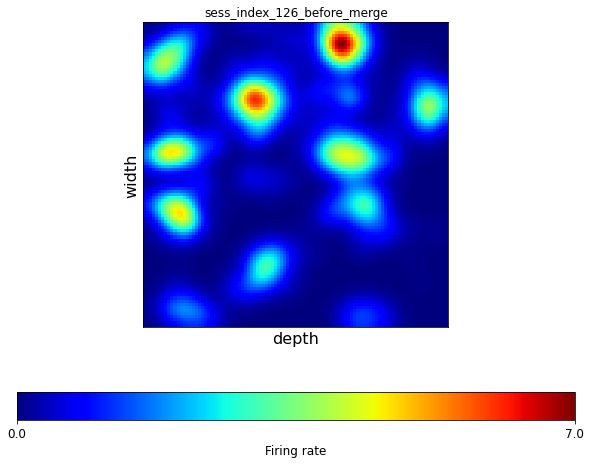

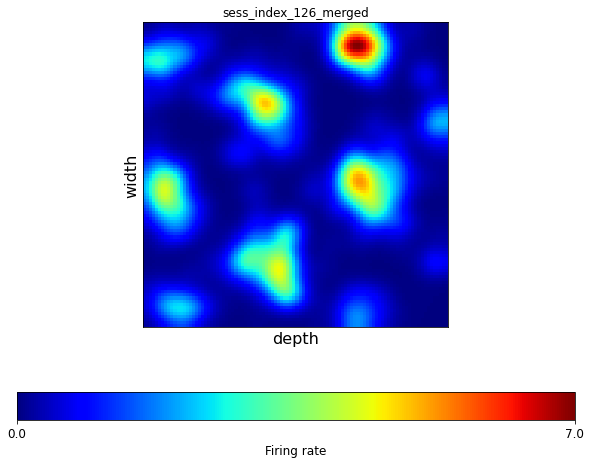

In [32]:
w_data.plot_recording_tetr(290), w_data.plot_recording_tetr(291)

(array([ 22.74530727,  25.34083148,  27.87766705, ..., -47.31918142,
        -43.15571437, -38.85497223]),
 array([-47.72532466, -53.15005108, -58.44461663, ...,  48.96340159,
         44.65526474,  40.20508285]),
 array([0.00000e+00, 2.00000e-02, 4.00000e-02, ..., 2.40094e+03,
        2.40096e+03, 2.40098e+03]))

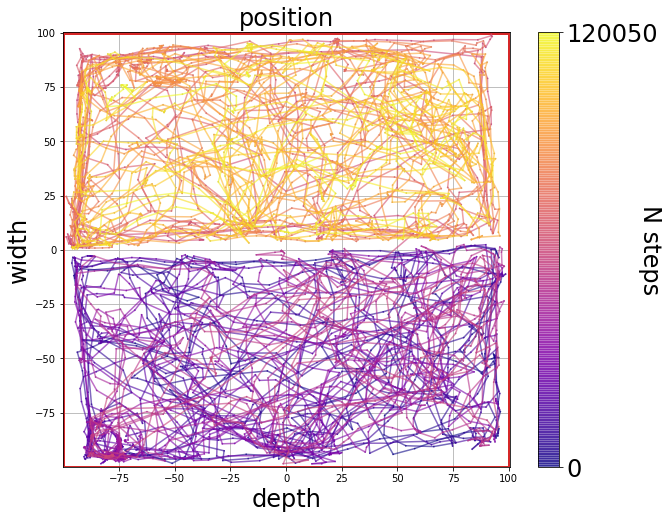

In [38]:
w_data.plot_trajectory(1)

([array([[0.02984943, 0.0309467 , 0.0333709 , ..., 0.0047847 , 0.00406989,
          0.00365365],
         [0.03445331, 0.03572474, 0.0385264 , ..., 0.00610517, 0.00519714,
          0.00466729],
         [0.04265511, 0.04424134, 0.04772513, ..., 0.00862272, 0.00734635,
          0.00659988],
         ...,
         [0.00474864, 0.0047486 , 0.00470486, ..., 0.00577958, 0.00317625,
          0.00201034],
         [0.00276798, 0.00276826, 0.00274395, ..., 0.004272  , 0.00234405,
          0.00148124],
         [0.00184006, 0.00184048, 0.00182518, ..., 0.00346493, 0.00189889,
          0.00119845]]),
  array([[7.43368984e-01, 8.14034847e-01, 9.46120828e-01, ...,
          3.48277553e-04, 1.95724404e-04, 1.27682702e-04],
         [7.62586198e-01, 8.38029986e-01, 9.80281409e-01, ...,
          5.91024038e-04, 3.37095633e-04, 2.22125130e-04],
         [7.96311147e-01, 8.80682681e-01, 1.04197028e+00, ...,
          1.17188432e-03, 6.76736285e-04, 4.49861698e-04],
         ...,
         [7.9339

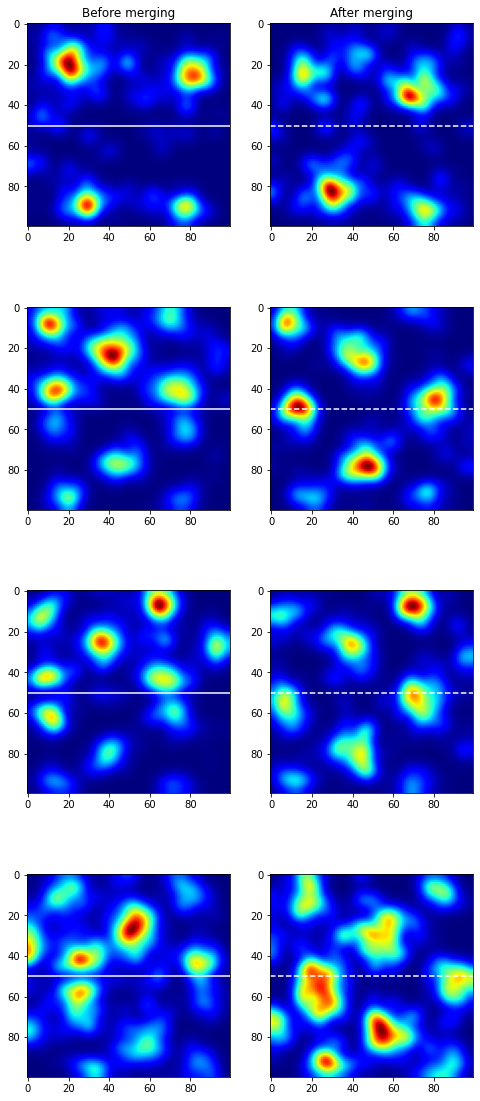

In [34]:
w_data.plot_merging_comparison(session_index=(100, 125, 126, 127))

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

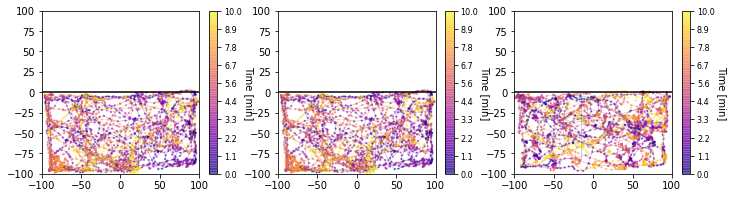

In [35]:
w_data.plot_development(merged=False, time_interval=(0, 10))

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

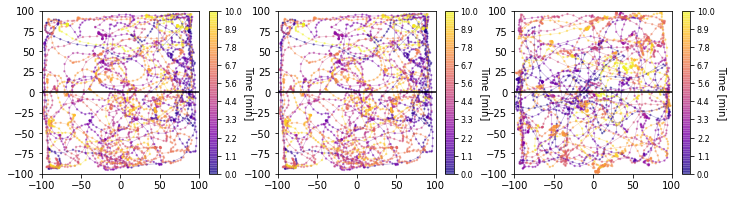

In [36]:
w_data.plot_development(merged=True, time_interval=(0, 10))